<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from tensorflow import keras
import matplotlib.pyplot as plt
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML

from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16

keras:  2.2.4-tf


## Step 1: Data Loading

In [2]:
#update base_dir to path where you saved the cats_and_dogs_small dataset
base_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 1/images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Step 2:  Develop the Image Classification Models

### Model #1 (Xception)

In [3]:
# Build the Model
img_size = 120
conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 50x50
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 2048))
    labels = np.zeros(shape=(sample_count, 10))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 2048))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 2048))
test_features = np.reshape(test_features, (1000, 4 * 4 * 2048))


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(4 * 4 * 2048,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 8,391,434
Trainable params: 8,391,434
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the Model
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/50
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4658 - acc: 0.5140 - val_loss: 0.8275 - val_acc: 0.7270
Epoch 2/50
2000/2000 [==============================] - 1s 737us/sample - loss: 0.8895 - acc: 0.7015 - val_loss: 0.7500 - val_acc: 0.7420
Epoch 3/50
2000/2000 [==============================] - 1s 743us/sample - loss: 0.6859 - acc: 0.7645 - val_loss: 0.7104 - val_acc: 0.7580
Epoch 4/50
2000/2000 [==============================] - 1s 713us/sample - loss: 0.5547 - acc: 0.8165 - val_loss: 0.6938 - val_acc: 0.7680
Epoch 5/50
2000/2000 [==============================] - 1s 713us/sample - loss: 0.4610 - acc: 0.8445 - val_loss: 0.6902 - val_acc: 0.7700
Epoch 6/50
2000/2000 [==============================] - 1s 733us/sample - loss: 0.3744 - acc: 0.8740 - val_loss: 0.6729 - val_acc: 0.7760
Epoch 7/50
2000/2000 [==============================] - 1s 725us/sample - loss: 0.3026 - acc: 0.9040 - val_loss: 0.6702 - val_

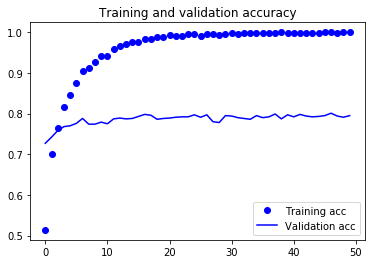

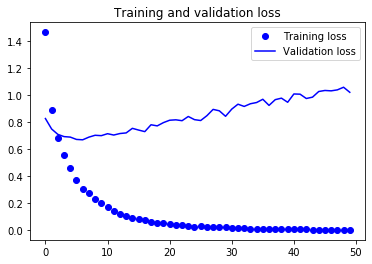

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Xception with augmentation

In [31]:
# Build the Model
img_size = 120
conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(input_shape=model.output_shape[1:]))
model.add(layers.Dense(512, activation='relu', input_shape=(4 * 4 * 2048, )))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False

model.summary()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
conv_base.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 4, 4, 2048)        20861480  
_________________________________________________________________
flatten_10 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               16777728  
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 37,644,338
Trainable params: 16,782,858
Non-trainable params: 20,861,480
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "xception"
__________________________________________________________________________________________________
Layer (type)               

In [32]:
# Train the Model
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 27s 272ms/step - loss: 1.9334 - acc: 0.3570 - val_loss: 1.3601 - val_acc: 0.5460
Epoch 2/30
100/100 [==============================] - 19s 193ms/step - loss: 1.5846 - acc: 0.5200 - val_loss: 1.2536 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 19s 194ms/step - loss: 1.4216 - acc: 0.5670 - val_loss: 1.3344 - val_acc: 0.6630
Epoch 4/30
100/100 [==============================] - 19s 195ms/step - loss: 1.3512 - acc: 0.5780 - val_loss: 1.1586 - val_acc: 0.7050
Epoch 5/30
100/100 [==============================] - 19s 186ms/step - loss: 1.2989 - acc: 0.6080 - val_loss: 1.3827 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 1.3089 - acc: 0.6035 - val_loss: 1.3123 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 19s 195ms/step - loss: 1.2393 - acc: 0.6285

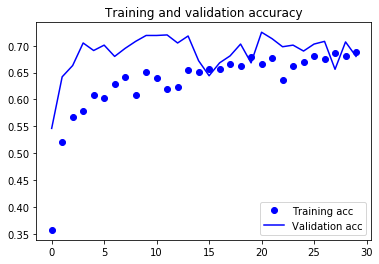

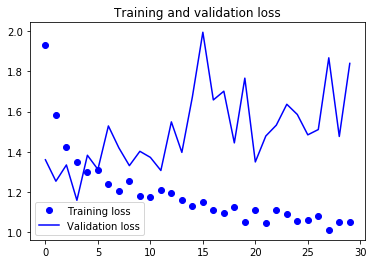

In [33]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Xception Fine Tuned (2 layers unfrozen)

In [7]:
# Build the Model
img_size = 120
conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block13_sepconv1_act':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(input_shape=model.output_shape[1:]))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
    
model.summary()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

conv_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 4, 4, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 54,427,186
Trainable params: 45,196,018
Non-trainable params: 9,231,168
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "xcepti

In [8]:
# Train the Model
model.compile(optimizer=optimizers.SGD(lr=6-4, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/50
100/100 [==============================] - 45s 448ms/step - loss: 1.9706 - acc: 0.3110 - val_loss: 1.3019 - val_acc: 0.5880
Epoch 2/50
100/100 [==============================] - 29s 295ms/step - loss: 1.3745 - acc: 0.5585 - val_loss: 1.1148 - val_acc: 0.6450
Epoch 3/50
100/100 [==============================] - 27s 270ms/step - loss: 1.1877 - acc: 0.6045 - val_loss: 0.9311 - val_acc: 0.6990
Epoch 4/50
100/100 [==============================] - 24s 244ms/step - loss: 1.0593 - acc: 0.6615 - val_loss: 0.8570 - val_acc: 0.7270
Epoch 5/50
100/100 [==============================] - 22s 222ms/step - loss: 0.9671 - acc: 0.6840 - val_loss: 0.8473 - val_acc: 0.7390
Epoch 6/50
100/100 [==============================] - 23s 231ms/step - loss: 0.9399 - acc: 0.6780 - val_loss: 0.7741 - val_acc: 0.7490
Epoch 7/50
100/100 [=

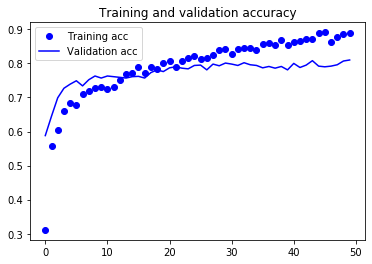

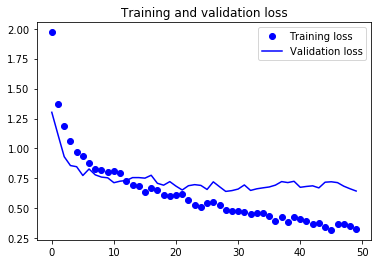

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Save the Model
model.save('food_model_xception.h5')

### Xception Fine Tuned (fully unfrozen)

In [8]:
# Build the Model
img_size = 120
conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

conv_base.trainable = True

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(input_shape=model.output_shape[1:]))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
    
model.summary()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

conv_base.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 4, 4, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 54,427,186
Trainable params: 54,372,658
Non-trainable params: 54,528
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "xception"

In [9]:
# Train the Model
model.compile(optimizer=optimizers.SGD(lr=2e-4, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=70,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/70
100/100 [==============================] - 42s 423ms/step - loss: 2.2275 - acc: 0.2050 - val_loss: 1.5896 - val_acc: 0.4950
Epoch 2/70
100/100 [==============================] - 27s 273ms/step - loss: 1.9102 - acc: 0.3575 - val_loss: 1.2763 - val_acc: 0.5870
Epoch 3/70
100/100 [==============================] - 26s 264ms/step - loss: 1.6002 - acc: 0.4680 - val_loss: 1.1059 - val_acc: 0.6440
Epoch 4/70
100/100 [==============================] - 25s 250ms/step - loss: 1.4232 - acc: 0.5320 - val_loss: 0.9899 - val_acc: 0.6770
Epoch 5/70
100/100 [==============================] - 26s 261ms/step - loss: 1.2813 - acc: 0.5860 - val_loss: 0.9216 - val_acc: 0.6940
Epoch 6/70
100/100 [==============================] - 26s 261ms/step - loss: 1.2071 - acc: 0.6095 - val_loss: 0.9023 - val_acc: 0.7030
Epoch 7/70
100/100 [==============================] - 25s 255ms/step - loss: 1.0980 - acc: 0.6470

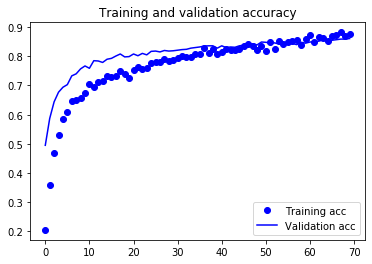

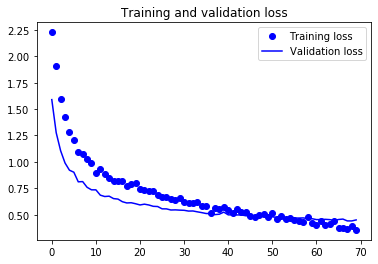

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Save the Model
model.save('food_model_xception.h5')

### Model #2 (VGG16 Without Augmentation)

In [3]:
# Build the Model
# Build the Model
img_size = 120
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 50x50
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 512))
    labels = np.zeros(shape=(sample_count, 10))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 3 * 3 * 512))
validation_features = np.reshape(validation_features, (1000, 3 * 3 * 512))
test_features = np.reshape(test_features, (1000, 3 * 3 * 512))


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(3 * 3 * 512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 1,182,474
Trainable params: 1,182,474
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Train the Model
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/50
2000/2000 [==============================] - 1s 722us/sample - loss: 2.5287 - acc: 0.1385 - val_loss: 2.0763 - val_acc: 0.2830
Epoch 2/50
2000/2000 [==============================] - 0s 248us/sample - loss: 2.1467 - acc: 0.2365 - val_loss: 1.8958 - val_acc: 0.3630
Epoch 3/50
2000/2000 [==============================] - 1s 271us/sample - loss: 1.9237 - acc: 0.3150 - val_loss: 1.7587 - val_acc: 0.4310
Epoch 4/50
2000/2000 [==============================] - 1s 271us/sample - loss: 1.7617 - acc: 0.3975 - val_loss: 1.6590 - val_acc: 0.4650
Epoch 5/50
2000/2000 [==============================] - 1s 261us/sample - loss: 1.6590 - acc: 0.4350 - val_loss: 1.5671 - val_acc: 0.5020
Epoch 6/50
2000/2000 [==============================] - 1s 252us/sample - loss: 1.5749 - acc: 0.4685 - val_loss: 1.5055 - val_acc: 0.5310
Epoch 7/50
2000/2000 [==============================] - 1s 251us/sample - loss: 1.4948 - acc: 0.5010 - val_loss: 1.4508 - va

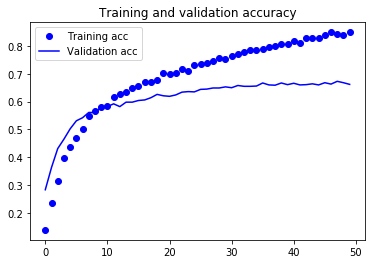

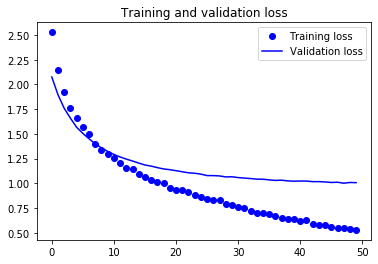

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### VGG16 With Augmentation

In [19]:
# Build the Model
img_size = 120
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(input_shape=model.output_shape[1:]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False

model.summary()

train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
conv_base.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 15,897,162
Trainable params: 1,182,474
Non-trainable params: 14,714,688
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

In [20]:
# Train the Model
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 28s 285ms/step - loss: 2.2060 - acc: 0.2150 - val_loss: 1.9959 - val_acc: 0.3410
Epoch 2/30
100/100 [==============================] - 24s 236ms/step - loss: 1.9005 - acc: 0.3790 - val_loss: 1.7498 - val_acc: 0.4410
Epoch 3/30
100/100 [==============================] - 22s 224ms/step - loss: 1.7115 - acc: 0.4545 - val_loss: 1.5767 - val_acc: 0.4910
Epoch 4/30
100/100 [==============================] - 21s 210ms/step - loss: 1.5683 - acc: 0.4975 - val_loss: 1.4581 - val_acc: 0.5350
Epoch 5/30
100/100 [==============================] - 21s 211ms/step - loss: 1.4362 - acc: 0.5595 - val_loss: 1.3859 - val_acc: 0.5470
Epoch 6/30
100/100 [==============================] - 20s 199ms/step - loss: 1.3642 - acc: 0.5645 - val_loss: 1.3081 - val_acc: 0.5700
Epoch 7/30
100/100 [==============================] - 21s 207ms/step - loss: 1.3007 - acc: 0.5765

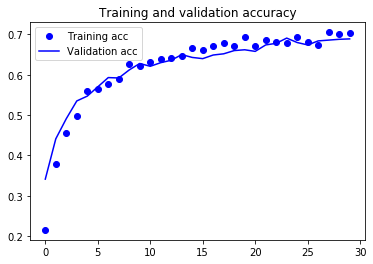

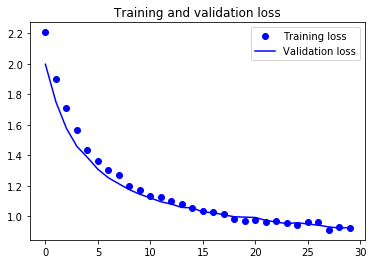

In [21]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### VGG16 Fine Tuned (2 layers unfrozen)

In [4]:
### VGG16 With Augmentation# Build the Model
img_size = 120
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(input_shape=model.output_shape[1:]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model.summary()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
conv_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 15,897,162
Trainable params: 15,637,002
Non-trainable params: 260,160
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "vgg16"
_

In [5]:
# Train the Model
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=60,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 60 steps
Epoch 1/100
100/100 [==============================] - 40s 402ms/step - loss: 2.4235 - acc: 0.1260 - val_loss: 2.0693 - val_acc: 0.2658
Epoch 2/100
100/100 [==============================] - 31s 311ms/step - loss: 2.0381 - acc: 0.2650 - val_loss: 1.8082 - val_acc: 0.3975
Epoch 3/100
100/100 [==============================] - 27s 270ms/step - loss: 1.8855 - acc: 0.3290 - val_loss: 1.5967 - val_acc: 0.4608
Epoch 4/100
100/100 [==============================] - 25s 250ms/step - loss: 1.7434 - acc: 0.3850 - val_loss: 1.4757 - val_acc: 0.5183
Epoch 5/100
100/100 [==============================] - 25s 251ms/step - loss: 1.5885 - acc: 0.4585 - val_loss: 1.2495 - val_acc: 0.5767
Epoch 6/100
100/100 [==============================] - 25s 251ms/step - loss: 1.5036 - acc: 0.4920 - val_loss: 1.3766 - val_acc: 0.5425
Epoch 7/100
100/100 [==============================] - 23s 230ms/step - loss: 1.4257 - acc:

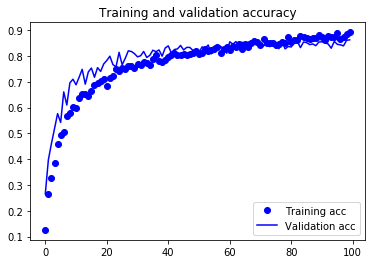

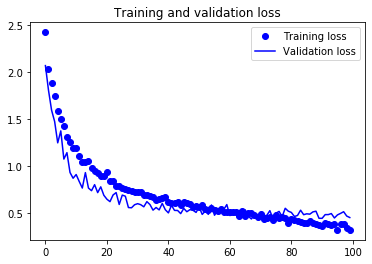

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_vgg16.h5')

### VGG16 Fine Tuned (fully unfrozen)

In [14]:
### VGG16 With Augmentation# Build the Model
img_size = 120
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(input_shape=model.output_shape[1:]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

model.summary()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
conv_base.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1179904   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 15,897,162
Trainable params: 15,897,162
Non-trainable params: 0
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "vgg16"
_______

In [15]:
# Train the Model
model.compile(optimizer=optimizers.SGD(lr=7e-5, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=60,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 60 steps
Epoch 1/100
100/100 [==============================] - 23s 233ms/step - loss: 2.4234 - acc: 0.1220 - val_loss: 2.1191 - val_acc: 0.2783
Epoch 2/100
100/100 [==============================] - 22s 223ms/step - loss: 2.1302 - acc: 0.2215 - val_loss: 1.9158 - val_acc: 0.3808
Epoch 3/100
100/100 [==============================] - 22s 223ms/step - loss: 1.9822 - acc: 0.2860 - val_loss: 1.7207 - val_acc: 0.4217
Epoch 4/100
100/100 [==============================] - 22s 223ms/step - loss: 1.8122 - acc: 0.3485 - val_loss: 1.5361 - val_acc: 0.4733
Epoch 5/100
100/100 [==============================] - 22s 220ms/step - loss: 1.6638 - acc: 0.4100 - val_loss: 1.3800 - val_acc: 0.5400
Epoch 6/100
100/100 [==============================] - 22s 225ms/step - loss: 1.5901 - acc: 0.4425 - val_loss: 1.3513 - val_acc: 0.5342
Epoch 7/100
100/100 [==============================] - 22s 221ms/step - loss: 1.4774 - acc:

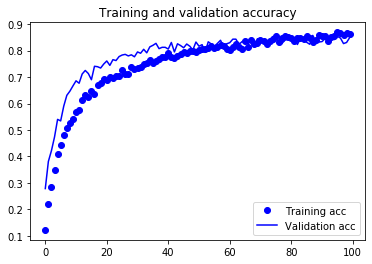

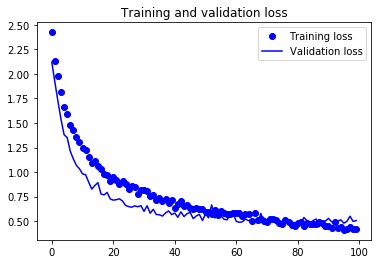

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #3 (Non-Pretrain Without Augmentation)

In [4]:
# Build the Model
img_size = 120

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 50x50
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
____________________________________

In [36]:
# Train the Model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 30s 297ms/step - loss: 2.2811 - acc: 0.1340 - val_loss: 2.2205 - val_acc: 0.1560
Epoch 2/100
100/100 [==============================] - 24s 244ms/step - loss: 2.1895 - acc: 0.1785 - val_loss: 2.1541 - val_acc: 0.2770
Epoch 3/100
100/100 [==============================] - 22s 224ms/step - loss: 2.1369 - acc: 0.2195 - val_loss: 2.1096 - val_acc: 0.2190
Epoch 4/100
100/100 [==============================] - 23s 231ms/step - loss: 2.0968 - acc: 0.2380 - val_loss: 2.0388 - val_acc: 0.2800
Epoch 5/100
100/100 [==============================] - 22s 219ms/step - loss: 2.0818 - acc: 0.2495 - val_loss: 1.9702 - val_acc: 0.3180
Epoch 6/100
100/100 [==============================] - 22s 223ms/step - loss: 2.0528 - acc: 0.2740 - val_loss: 1.9833 - val_acc: 0.3050
Epoch 7/100
100/100 [==============================] - 24s 238ms/step - loss: 2.0038 - acc:

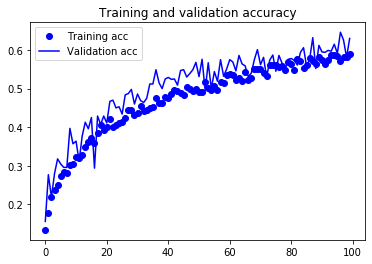

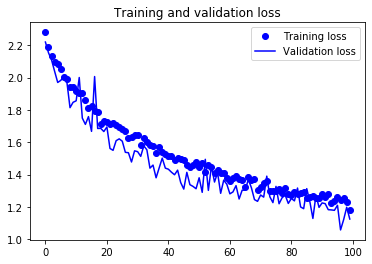

In [37]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_2.h5')

### Model #3 (Non-Pretrain With Augmentation)

In [15]:
# Build the Model
img_size = 120

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

model.summary()

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 118, 118, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 57, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 64)        0         
__________________________________

In [16]:
# Train the Model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=7500//10,
      epochs=120,
      validation_data=validation_generator,
      validation_steps=2000//10,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 750 steps, validate for 200 steps
Epoch 1/120
750/750 [==============================] - 76s 101ms/step - loss: 2.2910 - acc: 0.1220 - val_loss: 2.2311 - val_acc: 0.1600
Epoch 2/120
750/750 [==============================] - 66s 88ms/step - loss: 2.1738 - acc: 0.1988 - val_loss: 2.0732 - val_acc: 0.2265
Epoch 3/120
750/750 [==============================] - 64s 85ms/step - loss: 1.9915 - acc: 0.2807 - val_loss: 1.8185 - val_acc: 0.3480
Epoch 4/120
750/750 [==============================] - 64s 86ms/step - loss: 1.8659 - acc: 0.3269 - val_loss: 1.6826 - val_acc: 0.3970
Epoch 5/120
750/750 [==============================] - 66s 88ms/step - loss: 1.7762 - acc: 0.3579 - val_loss: 1.6186 - val_acc: 0.4165
Epoch 6/120
750/750 [==============================] - 63s 85ms/step - loss: 1.6963 - acc: 0.4032 - val_loss: 1.5621 - val_acc: 0.4500
Epoch 7/120
750/750 [==============================] - 64s 85ms/step - loss: 1.6371 - acc: 0.42

Epoch 60/120
750/750 [==============================] - 65s 86ms/step - loss: 0.9142 - acc: 0.6884 - val_loss: 1.0002 - val_acc: 0.6810
Epoch 61/120
750/750 [==============================] - 62s 83ms/step - loss: 0.9051 - acc: 0.6868 - val_loss: 1.0446 - val_acc: 0.6630
Epoch 62/120
750/750 [==============================] - 64s 86ms/step - loss: 0.9154 - acc: 0.6856 - val_loss: 0.9528 - val_acc: 0.6960
Epoch 63/120
750/750 [==============================] - 64s 85ms/step - loss: 0.9073 - acc: 0.6908 - val_loss: 0.9072 - val_acc: 0.7050
Epoch 64/120
750/750 [==============================] - 63s 83ms/step - loss: 0.9175 - acc: 0.6929 - val_loss: 0.9212 - val_acc: 0.6940
Epoch 65/120
750/750 [==============================] - 64s 86ms/step - loss: 0.9104 - acc: 0.6971 - val_loss: 0.9272 - val_acc: 0.6845
Epoch 66/120
750/750 [==============================] - 65s 87ms/step - loss: 0.8942 - acc: 0.6965 - val_loss: 0.9635 - val_acc: 0.6875
Epoch 67/120
750/750 [==========================

750/750 [==============================] - 65s 87ms/step - loss: 0.7935 - acc: 0.7297 - val_loss: 0.9065 - val_acc: 0.7180


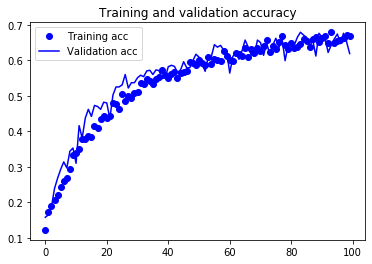

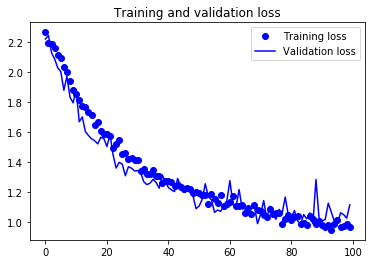

In [12]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [ ]:
# Model #1
model.load_weights('food_model_1.h5')




In [ ]:
# Model #2
model.load_weights('food_model_2.h5')




In [ ]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [ ]:
# Load the model
model.load_weights('food_model_best.h5')

In [ ]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [ ]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)